In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


**DATA LOADING**# 

In [2]:
df_train = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv')
df_test = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')
print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")
display(df_train.head())
display(df_test.head())

Training data shape: (8000, 30)
Test data shape: (2845, 29)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


**DATA EXPLORATION**# 

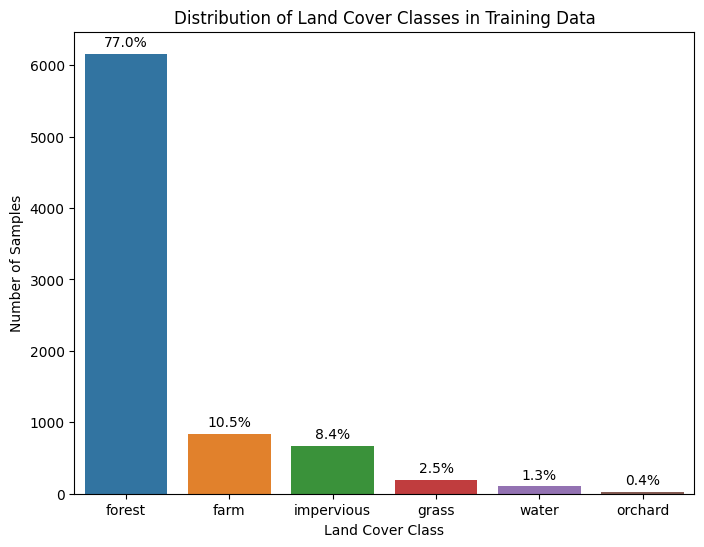

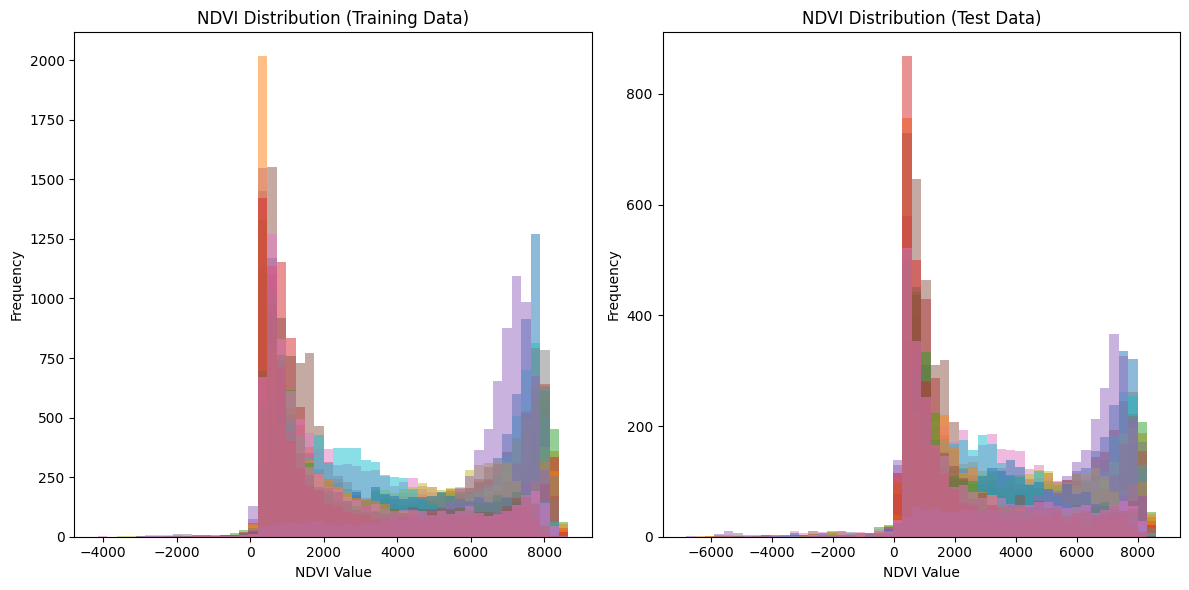

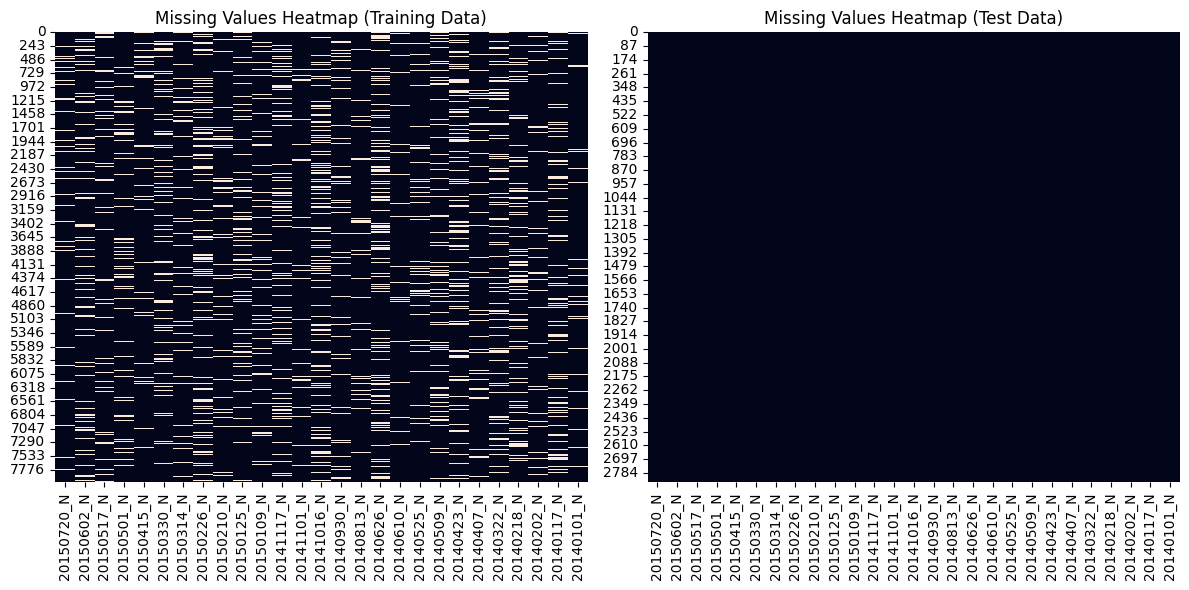

Missing Values (Training):
 20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64
Missing Values (Test):
 20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
201401

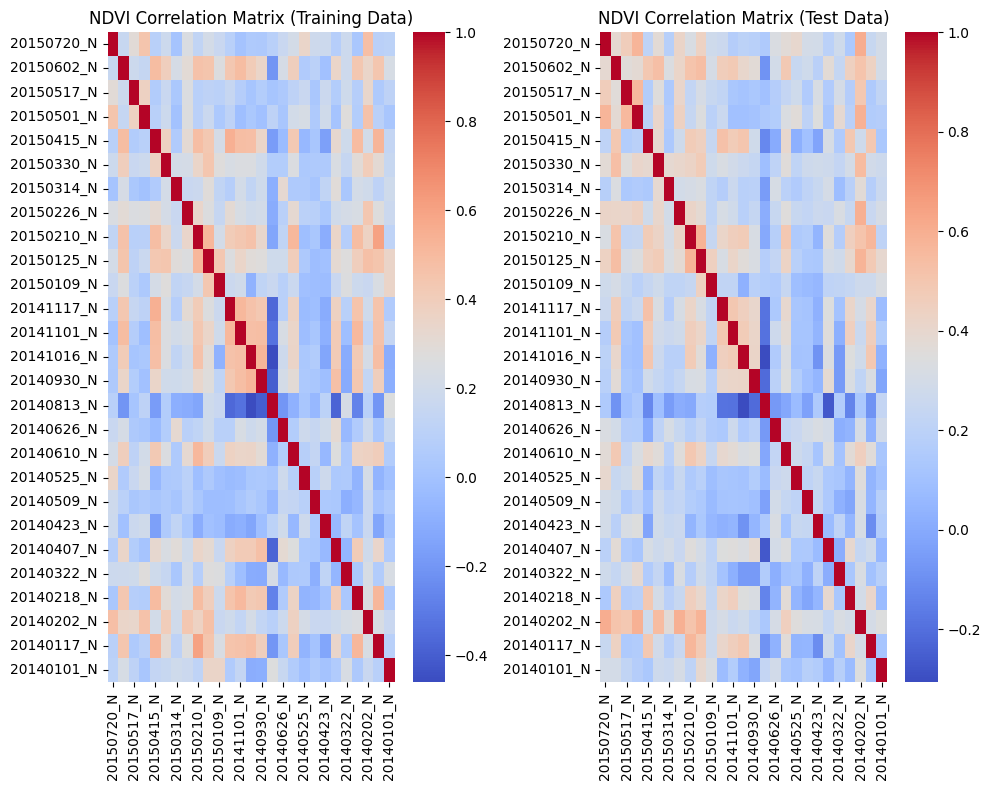

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Class Distribution in Training Data
plt.figure(figsize=(8, 6))
class_counts = df_train['class'].value_counts()
class_percentages = (class_counts / len(df_train)) * 100
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Land Cover Classes in Training Data')
plt.xlabel('Land Cover Class')
plt.ylabel('Number of Samples')
for i, v in enumerate(class_counts):
    plt.text(i, v + 100, f'{class_percentages.iloc[i]:.1f}%', ha='center') # Fixed: Use iloc for indexing
plt.show()

# 2. NDVI Value Distributions
ndvi_cols = [col for col in df_train.columns if '_N' in col]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_train[ndvi_cols].plot(kind='hist', bins=50, alpha=0.5, legend=False, ax=plt.gca())
plt.title('NDVI Distribution (Training Data)')
plt.xlabel('NDVI Value')
plt.subplot(1, 2, 2)
df_test[ndvi_cols].plot(kind='hist', bins=50, alpha=0.5, legend=False, ax=plt.gca())
plt.title('NDVI Distribution (Test Data)')
plt.xlabel('NDVI Value')
plt.tight_layout()
plt.show()


# 3. Missing Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df_train[ndvi_cols].isnull(), cbar=False)
plt.title('Missing Values Heatmap (Training Data)')
plt.subplot(1, 2, 2)
sns.heatmap(df_test[ndvi_cols].isnull(), cbar=False)
plt.title('Missing Values Heatmap (Test Data)')
plt.tight_layout()
plt.show()

missing_train = df_train[ndvi_cols].isnull().sum()
missing_test = df_test[ndvi_cols].isnull().sum()
print("Missing Values (Training):\n", missing_train)
print("Missing Values (Test):\n", missing_test)


# 4. Descriptive Statistics and Correlation
print("Descriptive Statistics (Training):\n", df_train[ndvi_cols].describe())
print("\nDescriptive Statistics (Test):\n", df_test[ndvi_cols].describe())

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.heatmap(df_train[ndvi_cols].corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('NDVI Correlation Matrix (Training Data)')
plt.subplot(1, 2, 2)
sns.heatmap(df_test[ndvi_cols].corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('NDVI Correlation Matrix (Test Data)')
plt.tight_layout()
plt.show()

DATA CLEANING


In [4]:
import numpy as np

# Impute missing NDVI values using linear interpolation
ndvi_cols = [col for col in df_train.columns if '_N' in col]
df_train[ndvi_cols] = df_train[ndvi_cols].interpolate(method='linear', axis=1)

# Apply a rolling median filter with a window size of 3
window_size = 3
for col in ndvi_cols:
    df_train[col] = df_train[col].rolling(window=window_size, center=True, min_periods=1).median()

FEATURE ENGINEERING

In [5]:
import numpy as np
from scipy.stats import linregress

# Store the original dataframe before imputation for later use
df_train_original = df_train.copy()

# Calculate NDVI statistics
ndvi_cols = [col for col in df_train.columns if '_N' in col]
df_train['ndvi_mean'] = df_train[ndvi_cols].mean(axis=1)
df_train['ndvi_std'] = df_train[ndvi_cols].std(axis=1)
df_train['ndvi_min'] = df_train[ndvi_cols].min(axis=1)
df_train['ndvi_max'] = df_train[ndvi_cols].max(axis=1)
df_train['ndvi_range'] = df_train['ndvi_max'] - df_train['ndvi_min']
df_train['ndvi_median'] = df_train[ndvi_cols].median(axis=1)

# Calculate the slope of the linear regression line
df_train['ndvi_slope'] = df_train[ndvi_cols].apply(lambda row: linregress(range(len(row)), row)[0], axis=1)

# Calculate the number of missing NDVI values before imputation
df_train['missing_ndvi_count'] = df_train_original[ndvi_cols].isnull().sum(axis=1)

# Display the first few rows of the updated dataframe to verify changes.
display(df_train.head())

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140117_N,20140101_N,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,ndvi_range,ndvi_median,ndvi_slope,missing_ndvi_count
0,0,1,water,635.9175,626.1865,-1753.910,-1798.34,956.051,-1216.18800,668.8565,...,-1270.3750,478.9905,-259.050007,946.305221,-2226.51,956.051,3182.561,193.5985,-0.700945,0
1,1,2,water,634.2400,593.7050,-1625.790,-1672.32,914.198,-1564.63000,630.0870,...,-1360.5600,433.9060,-214.004533,916.288772,-2203.02,914.198,3117.218,220.8780,-0.765531,0
2,3,4,water,72.5180,226.4770,-1325.895,-1256.93,515.805,-1413.18000,-417.4200,...,-1512.0435,-826.7270,-352.895481,980.840272,-2829.40,952.178,3781.578,72.5180,-4.854324,0
3,4,5,water,72.5180,226.4770,380.436,-1052.63,515.805,-1413.18000,-417.4200,...,-1512.0435,-1343.5500,-287.880833,993.482244,-2829.40,952.178,3781.578,226.4770,-20.689193,0
4,7,8,water,1116.8600,354.3565,380.436,1647.83,1046.670,-7.58804,1435.9900,...,-1187.4500,-1255.1000,456.502947,980.546239,-2070.45,1660.650,3731.100,683.2540,-37.041323,0


DATA SPLITTING

In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_train.drop(['class', 'ID', 'Unnamed: 0'], axis=1)
y = df_train['class']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

MODEL TRAINING

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Initialize and train the model again
logreg_model = LogisticRegression(max_iter=1000, solver='saga')
logreg_model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

MODEL OPTIMIZATION

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['saga', 'liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_imputed, y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print(f"Best hyperparameters: {best_params}")

# Evaluate the model on the validation set
y_pred = best_estimator.predict(X_val_imputed)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on validation set: 0.935625


DATA PREPARATION

In [9]:
import numpy as np
from scipy.stats import linregress
from sklearn.impute import SimpleImputer

# Preprocess test data
ndvi_cols_test = [col for col in df_test.columns if '_N' in col]

# Impute missing values (if any)
df_test[ndvi_cols_test] = df_test[ndvi_cols_test].interpolate(method='linear', axis=1)

# Apply rolling median filter
window_size = 3
for col in ndvi_cols_test:
    df_test[col] = df_test[col].rolling(window=window_size, center=True, min_periods=1).median()

# Feature engineering
df_test['ndvi_mean'] = df_test[ndvi_cols_test].mean(axis=1)
df_test['ndvi_std'] = df_test[ndvi_cols_test].std(axis=1)
df_test['ndvi_min'] = df_test[ndvi_cols_test].min(axis=1)
df_test['ndvi_max'] = df_test[ndvi_cols_test].max(axis=1)
df_test['ndvi_range'] = df_test['ndvi_max'] - df_test['ndvi_min']
df_test['ndvi_median'] = df_test[ndvi_cols_test].median(axis=1)
df_test['ndvi_slope'] = df_test[ndvi_cols_test].apply(lambda row: linregress(range(len(row)), row)[0], axis=1)
df_test['missing_ndvi_count'] = df_test[ndvi_cols_test].isnull().sum(axis=1)


# Align features with training data
X_test_prepared = df_test.drop(['ID', 'Unnamed: 0'], axis=1)

# Ensure same columns in X_test_prepared as in X_train
missing_cols = set(X_train.columns) - set(X_test_prepared.columns)
for c in missing_cols:
    X_test_prepared[c] = 0  # Or use a more sophisticated imputation method

# Reorder columns to match X_train
X_test_prepared = X_test_prepared[X_train.columns]

# Impute any remaining missing values with mean from training data
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_test_prepared = imputer.transform(X_test_prepared)

MODEL EVALUATION

In [10]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Predict the land cover classes for the test data
y_pred_test = best_estimator.predict(X_test_prepared)

# Create a submission DataFrame
submission_df = pd.DataFrame({'ID': df_test['ID'], 'class': y_pred_test})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)



In [11]:
import pandas as pd

# Read the saved submission file
submission_check = pd.read_csv('/kaggle/working/submission.csv')

# Display the first few rows of the DataFrame
print(submission_check.head())

   ID    class
0   1  orchard
1   2  orchard
2   3  orchard
3   4  orchard
4   5     farm
